In [ ]:
load(file = "./data/codingSchemes.rdata")

# 把race变为因子型，并放到新的一列中
hsb2$race.f <- factor(
  hsb2$race,
  labels = c("Hispanic", "Asian", "African-Am", "Caucasian")
)

# 根据race.f进行分组，计算分组后因变量write的均值
tapply(hsb2$write, hsb2$race.f, mean)

# Hispanic      Asian African-Am  Caucasian 
#   46.45833   58.00000   48.20000   54.05517

Hispanic      Asian African-Am  Caucasian 
  46.45833   58.00000   48.20000   54.05517

In [2]:
head(hsb2)

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,race.f
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,70,0,4,1,1,1,57,52,41,47,57,Caucasian
2,121,1,4,2,1,3,68,59,53,63,61,Caucasian
3,86,0,4,3,1,1,44,33,54,58,31,Caucasian
4,141,0,4,3,1,3,63,44,47,53,56,Caucasian
5,172,0,4,2,1,2,47,52,57,53,61,Caucasian
6,113,0,4,2,1,2,44,52,51,63,61,Caucasian


In [4]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [9]:
hsb2 %>%
  mutate(value = 1) %>%
  pivot_wider(
    names_from = race.f,
    values_from = value,
    values_fill = 0
  ) %>%
  select(-Hispanic) %>%
  glimpse()

Rows: 200
Columns: 14
$ id           <int> 70, 121, 86, 141, 172, 113, 50, 11, 84, 48, 75, 60, 95, 1~
$ female       <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ race         <int> 4, 4, 4, 4, 4, 4, 3, 1, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, ~
$ ses          <int> 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 2, 3, ~
$ schtyp       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, ~
$ prog         <int> 1, 3, 1, 3, 2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 1, 2, 1, 2, ~
$ read         <int> 57, 68, 44, 63, 47, 44, 50, 34, 63, 57, 60, 57, 73, 54, 4~
$ write        <int> 52, 59, 33, 44, 52, 52, 59, 46, 57, 55, 46, 65, 60, 63, 5~
$ math         <int> 41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 5~
$ science      <int> 47, 63, 58, 53, 53, 63, 53, 39, 58, 50, 53, 63, 61, 55, 3~
$ socst        <int> 57, 61, 31, 56, 61, 61, 61, 36, 51, 51, 61, 61, 71, 46, 5~
$ Caucasian    <dbl> 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ~
$ `African-Am` <db

In [13]:
hsb2 %>%
  mutate(value = 1) %>%
  pivot_wider(
    names_from = race.f,
    values_from = value,
    values_fill = 0,
    names_prefix = "race_"
  ) %>%
  mutate(
    across(starts_with("race_"), \(x) x - 1 / 4)
  ) %>%
  select(-race_Hispanic) %>%
  glimpse()

Rows: 200
Columns: 14
$ id                <int> 70, 121, 86, 141, 172, 113, 50, 11, 84, 48, 75, 60, ~
$ female            <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ race              <int> 4, 4, 4, 4, 4, 4, 3, 1, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4~
$ ses               <int> 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 2~
$ schtyp            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2~
$ prog              <int> 1, 3, 1, 3, 2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 1, 2, 1~
$ read              <int> 57, 68, 44, 63, 47, 44, 50, 34, 63, 57, 60, 57, 73, ~
$ write             <int> 52, 59, 33, 44, 52, 52, 59, 46, 57, 55, 46, 65, 60, ~
$ math              <int> 41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, ~
$ science           <int> 47, 63, 58, 53, 53, 63, 53, 39, 58, 50, 53, 63, 61, ~
$ socst             <int> 57, 61, 31, 56, 61, 61, 61, 36, 51, 51, 61, 61, 71, ~
$ race_Caucasian    <dbl> 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, -0.25, -0.25, 0.~
$ `race_African-Am

In [15]:
hsb2 %>%
  mutate(
    value = ifelse(race.f == "Hispanic", -1, 1)
  ) %>%
  pivot_wider(
    names_from = race.f,
    values_from = value,
    values_fill = 0,
    names_prefix = "race_"
  ) %>%
  # 对照组都是-1
  mutate(
    across(starts_with("race_"), \(x) x + race_Hispanic)
  ) %>%
  select(-race_Hispanic) %>%
  glimpse()

Rows: 200
Columns: 14
$ id                <int> 70, 121, 86, 141, 172, 113, 50, 11, 84, 48, 75, 60, ~
$ female            <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ race              <int> 4, 4, 4, 4, 4, 4, 3, 1, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4~
$ ses               <int> 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 2~
$ schtyp            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2~
$ prog              <int> 1, 3, 1, 3, 2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 1, 2, 1~
$ read              <int> 57, 68, 44, 63, 47, 44, 50, 34, 63, 57, 60, 57, 73, ~
$ write             <int> 52, 59, 33, 44, 52, 52, 59, 46, 57, 55, 46, 65, 60, ~
$ math              <int> 41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, ~
$ science           <int> 47, 63, 58, 53, 53, 63, 53, 39, 58, 50, 53, 63, 61, ~
$ socst             <int> 57, 61, 31, 56, 61, 61, 61, 36, 51, 51, 61, 61, 71, ~
$ race_Caucasian    <dbl> 1, 1, 1, 1, 1, 1, 0, -1, 1, 0, 1, 1, 1, 1, 0, 1, 1, ~
$ `race_African-Am

In [16]:
contrasts(hsb2$race.f)

,Asian,African-Am,Caucasian
Hispanic,0,0,0
Asian,1,0,0
African-Am,0,1,0
Caucasian,0,0,1


In [17]:
# 和上面的比较矩阵一模一样的形式
contrasts(hsb2$race.f)
##            Asian African-Am Caucasian
## Hispanic       0          0         0
## Asian          1          0         0
## African-Am     0          1         0
## Caucasian      0          0         1

,Asian,African-Am,Caucasian
Hispanic,0,0,0
Asian,1,0,0
African-Am,0,1,0
Caucasian,0,0,1


In [ ]:
contrasts(hsb2$race.f) <- contr.sum(4)
contrasts(hsb2$race.f)

# [,1] [,2] [,3]
# Hispanic    1    0    0  
# Asian       0    1    0  
# African-Am  0    0    1  
# Caucasian  -1   -1   -1

Hispanic,1,0,0
Asian,0,1,0
African-Am,0,0,1
Caucasian,-1,-1,-1


In [ ]:
# 新建一列，根据read转换为有序因子
hsb2$readcat <- cut(hsb2$read, 4, ordered = T)

contrasts(hsb2$readcat) <- contr.poly(4)
contrasts(hsb2$readcat)

# .L         .Q   .C        
# (28,40] -0.6708204  0.5 -0.2236068
# (40,52] -0.2236068 -0.5  0.6708204
# (52,64]  0.2236068 -0.5 -0.6708204
# (64,76]  0.6708204  0.5  0.2236068

,.L,.Q,.C
"(28,40]",-0.6708204,0.5,-0.2236068
"(40,52]",-0.2236068,-0.5,0.6708204
"(52,64]",0.2236068,-0.5,-0.6708204
"(64,76]",0.6708204,0.5,0.2236068


In [ ]:
contrasts(hsb2$race.f) <- contr.helmert(4)
contrasts(hsb2$race.f)

# [,1] [,2] [,3]
# Hispanic   -1   -1   -1  
# Asian       1   -1   -1  
# African-Am  0    2   -1  
# Caucasian   0    0    3

Hispanic,-1,-1,-1
Asian,1,-1,-1
African-Am,0,2,-1
Caucasian,0,0,3


In [25]:
library(mlr3verse)

Loading required package: mlr3



In [26]:
tsk <- as_task_regr(hsb2, "write")

gr <- po(
  "encode",
  method = "treatment",
  # 选择需要编码的列
  affect_columns = selector_name("race.f")
)

gr$train(list(tsk))[[1]]$head()

write,race.f.Asian,race.f.African.Am,race.f.Caucasian,female,id,math,prog,race,read,readcat,schtyp,science,ses,socst
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<ord>,<int>,<int>,<int>,<int>
52,0,0,1,0,70,41,1,4,57,"(52,64]",1,47,1,57
59,0,0,1,1,121,53,3,4,68,"(64,76]",1,63,2,61
33,0,0,1,0,86,54,1,4,44,"(40,52]",1,58,3,31
44,0,0,1,0,141,47,3,4,63,"(52,64]",1,53,3,56
52,0,0,1,0,172,57,2,4,47,"(40,52]",1,53,2,61
52,0,0,1,0,113,51,2,4,44,"(40,52]",1,63,2,61


In [27]:
gr <- po(
  "encode",
  method = "one-hot",
  # 选择需要编码的列
  affect_columns = selector_name("race.f")
)

gr$train(list(tsk))[[1]]$head()

write,race.f.Hispanic,race.f.Asian,race.f.African.Am,race.f.Caucasian,female,id,math,prog,race,read,readcat,schtyp,science,ses,socst
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<ord>,<int>,<int>,<int>,<int>
52,0,0,0,1,0,70,41,1,4,57,"(52,64]",1,47,1,57
59,0,0,0,1,1,121,53,3,4,68,"(64,76]",1,63,2,61
33,0,0,0,1,0,86,54,1,4,44,"(40,52]",1,58,3,31
44,0,0,0,1,0,141,47,3,4,63,"(52,64]",1,53,3,56
52,0,0,0,1,0,172,57,2,4,47,"(40,52]",1,53,2,61
52,0,0,0,1,0,113,51,2,4,44,"(40,52]",1,63,2,61


In [28]:
gr <- po(
  "encode",
  method = "sum",
  # 选择需要编码的列
  affect_columns = selector_name("race.f")
)

gr$train(list(tsk))[[1]]$head()

write,race.f.1,race.f.2,race.f.3,female,id,math,prog,race,read,readcat,schtyp,science,ses,socst
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<ord>,<int>,<int>,<int>,<int>
52,-1,-1,-1,0,70,41,1,4,57,"(52,64]",1,47,1,57
59,-1,-1,-1,1,121,53,3,4,68,"(64,76]",1,63,2,61
33,-1,-1,-1,0,86,54,1,4,44,"(40,52]",1,58,3,31
44,-1,-1,-1,0,141,47,3,4,63,"(52,64]",1,53,3,56
52,-1,-1,-1,0,172,57,2,4,47,"(40,52]",1,53,2,61
52,-1,-1,-1,0,113,51,2,4,44,"(40,52]",1,63,2,61


In [30]:
gr <- po(
  "encode",
  method = "poly",
  # 选择需要编码的列
  affect_columns = selector_name("race.f")
)

gr$train(list(tsk))[[1]]$head()

write,race.f.1,race.f.2,race.f.3,female,id,math,prog,race,read,readcat,schtyp,science,ses,socst
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<ord>,<int>,<int>,<int>,<int>
52,0.6708204,0.5,0.2236068,0,70,41,1,4,57,"(52,64]",1,47,1,57
59,0.6708204,0.5,0.2236068,1,121,53,3,4,68,"(64,76]",1,63,2,61
33,0.6708204,0.5,0.2236068,0,86,54,1,4,44,"(40,52]",1,58,3,31
44,0.6708204,0.5,0.2236068,0,141,47,3,4,63,"(52,64]",1,53,3,56
52,0.6708204,0.5,0.2236068,0,172,57,2,4,47,"(40,52]",1,53,2,61
52,0.6708204,0.5,0.2236068,0,113,51,2,4,44,"(40,52]",1,63,2,61


In [31]:
gr <- po(
  "encode",
  method = "helmert",
  # 选择需要编码的列
  affect_columns = selector_name("race.f")
)

gr$train(list(tsk))[[1]]$head()

write,race.f.1,race.f.2,race.f.3,female,id,math,prog,race,read,readcat,schtyp,science,ses,socst
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<ord>,<int>,<int>,<int>,<int>
52,0,0,3,0,70,41,1,4,57,"(52,64]",1,47,1,57
59,0,0,3,1,121,53,3,4,68,"(64,76]",1,63,2,61
33,0,0,3,0,86,54,1,4,44,"(40,52]",1,58,3,31
44,0,0,3,0,141,47,3,4,63,"(52,64]",1,53,3,56
52,0,0,3,0,172,57,2,4,47,"(40,52]",1,53,2,61
52,0,0,3,0,113,51,2,4,44,"(40,52]",1,63,2,61


In [35]:
gr <- po(
  "encode",
  method = "impact",
  # 选择需要编码的列
  affect_columns = selector_name("race.f")
)

gr$train(list(tsk))[[1]]$head()

ERROR: Error in self$assert(xs, sanitize = TRUE): Assertion on 'xs' failed: method: Must be element of set {'one-hot','treatment','helmert','poly','sum'}, but is 'impact'.


In [ ]:
tsk_iris <- tsk("iris")
gr <- po("")

In [37]:
library(mlr3verse)

In [44]:
po <- po("kernelpca")

po$param_set

<ParamSet(6)>
               id    class lower upper nlevels        default  value
           <char>   <char> <num> <num>   <num>         <list> <list>
1:         kernel ParamFct    NA    NA       8         rbfdot [NULL]
2:           kpar ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
3:       features ParamInt     0   Inf     Inf              0 [NULL]
4:             th ParamDbl     0   Inf     Inf          1e-04 [NULL]
5:      na.action ParamUty    NA    NA     Inf  <function[1]> [NULL]
6: affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [45]:
library(mlr3pipelines)
tsk <- tsk("german_credit")  # 二分类任务

# 创建类别平衡管道，目标是完全平衡
gr <- po("classbalancing", ratio = 1, reference = "minor", adjust = "all")

# 应用于任务
tsk_balanced <- gr$train(list(tsk))[[1]]

# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])


good  bad 
 300  300 

In [ ]:
library(mlr3pipelines)
tsk <- tsk("german_credit")  # 二分类任务

# 只对多数类进行欠采样，使其与少数类数量相等
gr <- po("classbalancing", ratio = 1, reference = "minor", adjust = "major")

tsk_balanced <- gr$train(list(tsk))[[1]]

# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# good  bad 
#  300  300


good  bad 
 300  300 

In [ ]:
library(mlr3pipelines)
tsk <- tsk("german_credit")  # 二分类任务

# 只对少数类进行过采样，使其与多数类数量相等
gr <- po("classbalancing", ratio = 1, reference = "major", adjust = "minor")

tsk_balanced <- gr$train(list(tsk))[[1]]

# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# good  bad 
#  700  700


good  bad 
 700  700 

In [56]:
head(tsk$data())

credit_risk,age,amount,credit_history,duration,employment_duration,foreign_worker,housing,installment_rate,job,...,other_debtors,other_installment_plans,people_liable,personal_status_sex,present_residence,property,purpose,savings,status,telephone
<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<ord>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
good,67,1169,all credits at this bank paid back duly,6,>= 7 yrs,no,rent,< 20,skilled employee/official,...,none,none,0 to 2,male : married/widowed,>= 7 yrs,unknown / no property,furniture/equipment,... >= 1000 DM,no checking account,yes (under customer name)
bad,22,5951,no credits taken/all credits paid back duly,48,1 <= ... < 4 yrs,no,rent,25 <= ... < 35,skilled employee/official,...,none,none,0 to 2,female : non-single or male : single,1 <= ... < 4 yrs,unknown / no property,furniture/equipment,unknown/no savings account,... < 0 DM,no
good,49,2096,all credits at this bank paid back duly,12,4 <= ... < 7 yrs,no,rent,25 <= ... < 35,unskilled - resident,...,none,none,3 or more,male : married/widowed,4 <= ... < 7 yrs,unknown / no property,repairs,unknown/no savings account,... >= 200 DM / salary for at least 1 year,no
good,45,7882,no credits taken/all credits paid back duly,42,4 <= ... < 7 yrs,no,own,25 <= ... < 35,skilled employee/official,...,guarantor,none,3 or more,male : married/widowed,>= 7 yrs,car or other,car (used),unknown/no savings account,no checking account,no
bad,53,4870,existing credits paid back duly till now,24,1 <= ... < 4 yrs,no,own,20 <= ... < 25,skilled employee/official,...,none,none,3 or more,male : married/widowed,>= 7 yrs,real estate,others,unknown/no savings account,no checking account,no
good,35,9055,no credits taken/all credits paid back duly,36,1 <= ... < 4 yrs,no,own,25 <= ... < 35,unskilled - resident,...,none,none,3 or more,male : married/widowed,>= 7 yrs,real estate,repairs,... >= 1000 DM,... >= 200 DM / salary for at least 1 year,yes (under customer name)


In [86]:
df <- tsk$data()
table(df$credit_risk)


good  bad 
 700  300 

In [83]:
library(mlr3pipelines)
tsk <- tsk("german_credit")  # 二分类任务

# 对少数类进行SMOTE过采样，使其与多数类数量相等
gr <- po("select", selector = selector_type("numeric")) %>>%
  po("smote")

tsk_balanced <- gr$train(tsk)[[1]]

# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])


good  bad 
 700  300 

In [88]:
library(mlr3)
library(smotefamily)

# 创建示例任务
data <- sample_generator(1000, ratio = 0.80)
data$result <- factor(data$result)
task <- TaskClassif$new(id = "example", backend = data, target = "result")
table(task$data()$result)

# 对少数类进行SMOTE过采样
pop <- po("smote")
smote_data <- pop$train(list(task))[[1]]$data()
table(smote_data$result)



  n   p 
802 198 


  n   p 
802 792 

In [99]:
tsk() %>% as.data.table()

key,label,task_type,nrow,ncol,properties,lgl,int,dbl,chr,fct,ord,pxc,dte
<chr>,<chr>,<chr>,<int>,<int>,<list>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ames_housing,Ames House Sales,regr,2930,82,,0,33,1,0,47,0,0,0
bike_sharing,Bike Sharing Demand,regr,17379,14,,2,4,4,1,2,0,0,0
boston_housing,Boston Housing Prices,regr,506,18,,0,3,12,0,2,0,0,0
breast_cancer,Wisconsin Breast Cancer,classif,683,10,twoclass,0,0,0,0,0,9,0,0
california_housing,California House Value,regr,20640,10,,0,0,8,0,1,0,0,0
german_credit,German Credit,classif,1000,21,twoclass,0,3,0,0,14,3,0,0
ilpd,Indian Liver Patient Data,classif,583,11,twoclass,0,4,5,0,1,0,0,0
iris,Iris Flowers,classif,150,5,multiclass,0,0,4,0,0,0,0,0
kc_housing,King County House Sales,regr,21613,20,,1,13,4,0,0,0,1,0


In [98]:
tsk("ilpd")

<TaskClassif:ilpd> (583 x 11): Indian Liver Patient Data
* Target: diseased
* Properties: twoclass
* Features (10):
  - dbl (5): albumin, albumin_globulin_ratio, direct_bilirubin,
    total_bilirubin, total_protein
  - int (4): age, alanine_transaminase, alkaline_phosphatase,
    aspartate_transaminase
  - fct (1): gender

In [100]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [102]:
library(mlr3pipelines)
tsk <- tsk("iris")  # 二分类任务
table(tsk$data()$Species)

# 对少数类进行SMOTE过采样
gr <- po("select", selector = selector_type("numeric")) %>>%
  po("smote")

tsk_balanced <- gr$train(tsk)[[1]]
# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])


    setosa versicolor  virginica 
        50         50         50 


    setosa versicolor  virginica 
       100         50         50 

In [106]:
tsk("penguins")$target_names

[1] "species"

In [109]:
tsk("penguins")$data() %>% head()

species,bill_depth,bill_length,body_mass,flipper_length,island,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>
Adelie,18.7,39.1,3750,181,Torgersen,male,2007
Adelie,17.4,39.5,3800,186,Torgersen,female,2007
Adelie,18.0,40.3,3250,195,Torgersen,female,2007
Adelie,NA,NA,NA,NA,Torgersen,NA,2007
Adelie,19.3,36.7,3450,193,Torgersen,female,2007
Adelie,20.6,39.3,3650,190,Torgersen,male,2007


In [ ]:
library(mlr3pipelines)
tsk <- tsk("penguins")  # 二分类任务
table(tsk$data()$species)

# 对少数类进行SMOTE过采样
gr <- po("select", selector = selector_type("numeric")) %>>%
  po("smote")

tsk_balanced <- gr$train(tsk)[[1]]
# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# Adelie Chinstrap    Gentoo 
#       152        68       124

# Adelie Chinstrap    Gentoo 
#       152       272       124


   Adelie Chinstrap    Gentoo 
      152        68       124 


   Adelie Chinstrap    Gentoo 
      152       272       124 

In [110]:
tsk_balanced$data() %>% head()

species,bill_depth,bill_length
<fct>,<dbl>,<dbl>
Adelie,18.7,39.1
Adelie,17.4,39.5
Adelie,18.0,40.3
Adelie,NA,NA
Adelie,19.3,36.7
Adelie,20.6,39.3


In [ ]:
library(mlr3pipelines)
tsk <- tsk("penguins")  # 二分类任务
table(tsk$data()$species)

# 对少数类进行SMOTE过采样
gr <- po("imputesample") %>>%
  po("select", selector = selector_type("numeric")) %>>%
  po("smotenc")

tsk_balanced <- gr$train(tsk)[[1]]
# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# Adelie Chinstrap    Gentoo 
#       152        68       124

# Adelie Chinstrap    Gentoo 
#       152       152       152


   Adelie Chinstrap    Gentoo 
      152        68       124 


   Adelie Chinstrap    Gentoo 
      152       152       152 

In [ ]:
library(mlr3pipelines)
tsk <- tsk("pima")  # 二分类任务
target <- tsk$target_names
table(tsk$data()[[target]])

# 对少数类进行SMOTE过采样
gr <- po("imputesample") %>>%
  po("smotenc")

tsk_balanced <- gr$train(tsk)[[1]]
# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# pos neg 
# 268 500

# pos neg 
# 500 500


pos neg 
268 500 


pos neg 
500 500 

In [ ]:
library(mlr3pipelines)
tsk <- tsk("pima")  # 二分类任务
target <- tsk$target_names
table(tsk$data()[[target]])

# 对少数类进行SMOTE过采样
gr <- po("imputesample") %>>%
  po("blsmote")

tsk_balanced <- gr$train(tsk)[[1]]
# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# pos neg 
# 268 500

# pos neg 
# 464 500


pos neg 
268 500 


pos neg 
464 500 

In [ ]:
library(mlr3pipelines)
tsk <- tsk("pima")  # 二分类任务
target <- tsk$target_names
table(tsk$data()[[target]])

# 对少数类进行ADAS过采样
gr <- po("imputesample") %>>%
  po("adas")

tsk_balanced <- gr$train(tsk)[[1]]
# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# pos neg 
# 268 500

# pos neg 
# 515 500


pos neg 
268 500 


pos neg 
515 500 

In [ ]:
library(mlr3pipelines)
tsk <- tsk("pima")  # 二分类任务
target <- tsk$target_names
table(tsk$data()[[target]])

# tomek
gr <- po("imputesample") %>>%
  po("tomek")

tsk_balanced <- gr$train(tsk)[[1]]
# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# pos neg 
# 268 500

# pos neg 
# 214 446


pos neg 
268 500 


pos neg 
214 446 

In [ ]:
library(mlr3pipelines)
tsk <- tsk("pima")  # 二分类任务
target <- tsk$target_names
table(tsk$data()[[target]])

# nearmiss
gr <- po("imputesample") %>>%
  po("nearmiss")

tsk_balanced <- gr$train(tsk)[[1]]
# 查看类别分布
table(tsk_balanced$data()[[tsk_balanced$target_names]])

# pos neg 
# 268 500

# pos neg 
# 268 268


pos neg 
268 500 


pos neg 
268 268 

In [129]:
df <- tsk("pima")$data()

In [134]:
iris %>%
  summarise(across(everything(), \(x) sum(is.na(x))))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<int>,<int>,<int>,<int>,<int>
0,0,0,0,0


In [135]:
library(caret)
findLinearCombos(iris)

Warning message in storage.mode(x) <- "double":
"NAs introduced by coercion"


ERROR: Error in qr.default(object): NA/NaN/Inf in foreign function call (arg 1)


In [ ]:
mlr_filters$keys()

# [1] "anova"             "auc"               "boruta"           
#  [4] "carscore"          "carsurvscore"      "cmim"             
#  [7] "correlation"       "disr"              "find_correlation" 
# [10] "importance"        "information_gain"  "jmi"              
# [13] "jmim"              "kruskal_test"      "mim"              
# [16] "mrmr"              "njmim"             "performance"      
# [19] "permutation"       "relief"            "selected_features"
# [22] "univariate_cox"    "variance"

[1] "anova"             "auc"               "boruta"           
 [4] "carscore"          "carsurvscore"      "cmim"             
 [7] "correlation"       "disr"              "find_correlation" 
[10] "importance"        "information_gain"  "jmi"              
[13] "jmim"              "kruskal_test"      "mim"              
[16] "mrmr"              "njmim"             "performance"      
[19] "permutation"       "relief"            "selected_features"
[22] "univariate_cox"    "variance"

In [2]:
library(mlr3verse)

Loading required package: mlr3



In [10]:
gr <- po(
  "filter",
  filter = flt("correlation"),
  filter.nfeat = 3
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,cyl,disp,wt
<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,2.620
21.0,6,160,2.875
22.8,4,108,2.320
21.4,6,258,3.215
18.7,8,360,3.440
18.1,6,225,3.460


In [9]:
gr$param_set

<ParamSetCollection(7)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]>    0.7
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:             use ParamFct    NA    NA       5     everything [NULL]
6:          method ParamFct    NA    NA       3        pearson [NULL]
7:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [32]:
gr <- po(
  "filter",
  filter = flt("correlation"),
  filter.cutoff = 0.8
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,cyl,disp,wt
<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,2.620
21.0,6,160,2.875
22.8,4,108,2.320
21.4,6,258,3.215
18.7,8,360,3.440
18.1,6,225,3.460


In [29]:
gr <- po(
  "filter",
  filter = flt("find_correlation"),
  filter.cutoff = -1
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,am,carb,cyl,disp,drat,gear,hp,qsec,vs,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,1,4,6,160,3.90,4,110,16.46,0,2.620
21.0,1,4,6,160,3.90,4,110,17.02,0,2.875
22.8,1,1,4,108,3.85,4,93,18.61,1,2.320
21.4,0,1,6,258,3.08,3,110,19.44,1,3.215
18.7,0,2,8,360,3.15,3,175,17.02,0,3.440
18.1,0,1,6,225,2.76,3,105,20.22,1,3.460


In [30]:
gr$param_set

<ParamSetCollection(7)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>     -1
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:             use ParamFct    NA    NA       5     everything [NULL]
6:          method ParamFct    NA    NA       3        pearson [NULL]
7:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [34]:
gr <- po(
  "filter",
  filter = flt("variance"),
  filter.cutoff = 0.1
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,am,carb,cyl,disp,drat,gear,hp,qsec,vs,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,1,4,6,160,3.90,4,110,16.46,0,2.620
21.0,1,4,6,160,3.90,4,110,17.02,0,2.875
22.8,1,1,4,108,3.85,4,93,18.61,1,2.320
21.4,0,1,6,258,3.08,3,110,19.44,1,3.215
18.7,0,2,8,360,3.15,3,175,17.02,0,3.440
18.1,0,1,6,225,2.76,3,105,20.22,1,3.460


In [35]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>    0.1
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:           na.rm ParamLgl    NA    NA       2           TRUE   TRUE
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [36]:
gr <- po(
  "filter",
  filter = flt("information_gain"),
  filter.cutoff = 0.1
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,cyl,disp,hp,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,2.620
21.0,6,160,110,2.875
22.8,4,108,93,2.320
21.4,6,258,110,3.215
18.7,8,360,175,3.440
18.1,6,225,105,3.460


In [37]:
gr$param_set

<ParamSetCollection(9)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>    0.1
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:            type ParamFct    NA    NA       3       infogain [NULL]
6:           equal ParamLgl    NA    NA       2          FALSE [NULL]
7:    discIntegers ParamLgl    NA    NA       2           TRUE [NULL]
8:         threads ParamInt     0   Inf     Inf              0 [NULL]
9:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [39]:
gr <- po(
  "filter",
  filter = flt("mim"),
  filter.cutoff = 0.1
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,carb,cyl,disp,drat,gear,hp,qsec,vs,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,4,6,160,3.90,4,110,16.46,0,2.620
21.0,4,6,160,3.90,4,110,17.02,0,2.875
22.8,1,4,108,3.85,4,93,18.61,1,2.320
21.4,1,6,258,3.08,3,110,19.44,1,3.215
18.7,2,8,360,3.15,3,175,17.02,0,3.440
18.1,1,6,225,2.76,3,105,20.22,1,3.460


In [40]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>    0.1
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:         threads ParamInt     0   Inf     Inf              0      1
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [41]:
gr <- po(
  "filter",
  filter = flt("jmi"),
  filter.cutoff = 0.1
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,am,carb,cyl,disp,drat,gear,hp,qsec,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,1,4,6,160,3.90,4,110,16.46,2.620
21.0,1,4,6,160,3.90,4,110,17.02,2.875
22.8,1,1,4,108,3.85,4,93,18.61,2.320
21.4,0,1,6,258,3.08,3,110,19.44,3.215
18.7,0,2,8,360,3.15,3,175,17.02,3.440
18.1,0,1,6,225,2.76,3,105,20.22,3.460


In [42]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>    0.1
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:         threads ParamInt     0   Inf     Inf              0      1
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [43]:
gr <- po(
  "filter",
  filter = flt("jmim"),
  filter.cutoff = 0.1
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,carb,cyl,disp,drat,gear,hp,qsec,vs,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,4,6,160,3.90,4,110,16.46,0,2.620
21.0,4,6,160,3.90,4,110,17.02,0,2.875
22.8,1,4,108,3.85,4,93,18.61,1,2.320
21.4,1,6,258,3.08,3,110,19.44,1,3.215
18.7,2,8,360,3.15,3,175,17.02,0,3.440
18.1,1,6,225,2.76,3,105,20.22,1,3.460


In [44]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>    0.1
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:         threads ParamInt     0   Inf     Inf              0      1
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [45]:
gr <- po(
  "filter",
  filter = flt("njmim"),
  filter.cutoff = 0.1
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,carb,cyl,disp,drat,gear,hp,qsec,vs,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,4,6,160,3.90,4,110,16.46,0,2.620
21.0,4,6,160,3.90,4,110,17.02,0,2.875
22.8,1,4,108,3.85,4,93,18.61,1,2.320
21.4,1,6,258,3.08,3,110,19.44,1,3.215
18.7,2,8,360,3.15,3,175,17.02,0,3.440
18.1,1,6,225,2.76,3,105,20.22,1,3.460


In [46]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>    0.1
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:         threads ParamInt     0   Inf     Inf              0      1
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [47]:
gr <- po(
  "filter",
  filter = flt("disr"),
  filter.cutoff = 0.1
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,carb,cyl,disp,drat,gear,hp,qsec,vs,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,4,6,160,3.90,4,110,16.46,0,2.620
21.0,4,6,160,3.90,4,110,17.02,0,2.875
22.8,1,4,108,3.85,4,93,18.61,1,2.320
21.4,1,6,258,3.08,3,110,19.44,1,3.215
18.7,2,8,360,3.15,3,175,17.02,0,3.440
18.1,1,6,225,2.76,3,105,20.22,1,3.460


In [48]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]> [NULL]
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>    0.1
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:         threads ParamInt     0   Inf     Inf              0      1
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [55]:
gr <- po(
  "filter",
  filter = flt("anova"),
  filter.nfeat = 3
)

tsk <- tsk("iris")
gr$train(list(tsk))[[1]]$head()

Species,Petal.Length,Petal.Width,Sepal.Length
<fct>,<dbl>,<dbl>,<dbl>
setosa,1.4,0.2,5.1
setosa,1.4,0.2,4.9
setosa,1.3,0.2,4.7
setosa,1.5,0.2,4.6
setosa,1.4,0.2,5.0
setosa,1.7,0.4,5.4


In [56]:
gr$param_set

<ParamSetCollection(5)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      3
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [57]:
gr <- po(
  "filter",
  filter = flt("kruskal_test"),
  filter.nfeat = 3
)

tsk <- tsk("iris")
gr$train(list(tsk))[[1]]$head()

Species,Petal.Length,Petal.Width,Sepal.Length
<fct>,<dbl>,<dbl>,<dbl>
setosa,1.4,0.2,5.1
setosa,1.4,0.2,4.9
setosa,1.3,0.2,4.7
setosa,1.5,0.2,4.6
setosa,1.4,0.2,5.0
setosa,1.7,0.4,5.4


In [58]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      3
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:       na.action ParamFct    NA    NA       3        na.omit [NULL]
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [60]:
library(mlr3proba)

Warning message:
"package 'mlr3proba' was built under R version 4.4.3"


In [ ]:
gr <- po(
  "filter",
  filter = flt("univariate_cox"),
  filter.nfeat = 3
)

library(mlr3proba)
tsk <- tsk("rats")
gr$train(list(tsk))[[1]]$head()

time,status,litter,rx,sex
<int>,<int>,<int>,<int>,<fct>
101,0,1,1,f
49,1,1,0,f
104,0,1,0,f
91,0,2,1,m
104,0,2,0,m
102,0,2,0,m


In [62]:
gr$param_set

<ParamSetCollection(5)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      3
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [64]:
gr <- po(
  "filter",
  filter = flt("auc"),
  filter.nfeat = 3
)

tsk <- tsk("german_credit")
gr$train(list(tsk))[[1]]$head()

credit_risk,age,amount,credit_history,duration,employment_duration,foreign_worker,housing,installment_rate,job,...,other_debtors,other_installment_plans,people_liable,personal_status_sex,present_residence,property,purpose,savings,status,telephone
<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<ord>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
good,67,1169,all credits at this bank paid back duly,6,>= 7 yrs,no,rent,< 20,skilled employee/official,...,none,none,0 to 2,male : married/widowed,>= 7 yrs,unknown / no property,furniture/equipment,... >= 1000 DM,no checking account,yes (under customer name)
bad,22,5951,no credits taken/all credits paid back duly,48,1 <= ... < 4 yrs,no,rent,25 <= ... < 35,skilled employee/official,...,none,none,0 to 2,female : non-single or male : single,1 <= ... < 4 yrs,unknown / no property,furniture/equipment,unknown/no savings account,... < 0 DM,no
good,49,2096,all credits at this bank paid back duly,12,4 <= ... < 7 yrs,no,rent,25 <= ... < 35,unskilled - resident,...,none,none,3 or more,male : married/widowed,4 <= ... < 7 yrs,unknown / no property,repairs,unknown/no savings account,... >= 200 DM / salary for at least 1 year,no
good,45,7882,no credits taken/all credits paid back duly,42,4 <= ... < 7 yrs,no,own,25 <= ... < 35,skilled employee/official,...,guarantor,none,3 or more,male : married/widowed,>= 7 yrs,car or other,car (used),unknown/no savings account,no checking account,no
bad,53,4870,existing credits paid back duly till now,24,1 <= ... < 4 yrs,no,own,20 <= ... < 25,skilled employee/official,...,none,none,3 or more,male : married/widowed,>= 7 yrs,real estate,others,unknown/no savings account,no checking account,no
good,35,9055,no credits taken/all credits paid back duly,36,1 <= ... < 4 yrs,no,own,25 <= ... < 35,unskilled - resident,...,none,none,3 or more,male : married/widowed,>= 7 yrs,real estate,repairs,... >= 1000 DM,... >= 200 DM / salary for at least 1 year,yes (under customer name)


In [65]:
gr$param_set

<ParamSetCollection(5)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      3
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [71]:
gr <- po(
  "filter",
  filter = flt(
    "performance",
    learner = lrn("classif.rpart"),
    measure = msr("classif.acc")
  ),
  filter.nfeat = 3
)

tsk <- tsk("german_credit")
gr$train(list(tsk))[[1]]$head()

INFO  [21:21:55.003] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.023] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.038] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.056] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.071] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.089] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.104] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.121] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.175] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.192] [mlr3] Applying learner 'classif.rpart' on task 'german_credit' (iter 1/1)
INFO  [21:21:55.210] [mlr3] Applying lea

credit_risk,credit_history,duration,job
<fct>,<fct>,<int>,<fct>
good,all credits at this bank paid back duly,6,skilled employee/official
bad,no credits taken/all credits paid back duly,48,skilled employee/official
good,all credits at this bank paid back duly,12,unskilled - resident
good,no credits taken/all credits paid back duly,42,skilled employee/official
bad,existing credits paid back duly till now,24,skilled employee/official
good,no credits taken/all credits paid back duly,36,unskilled - resident


In [67]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      3
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:          method ParamFct    NA    NA       3           mode   mode
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [73]:
gr <- po(
  "filter",
  filter = flt("relief"),
  filter.nfeat = 3
)

tsk <- tsk("german_credit")
gr$train(list(tsk))[[1]]$head()

credit_risk,other_debtors,savings,telephone
<fct>,<fct>,<fct>,<fct>
good,none,... >= 1000 DM,yes (under customer name)
bad,none,unknown/no savings account,no
good,none,unknown/no savings account,no
good,guarantor,unknown/no savings account,no
bad,none,unknown/no savings account,no
good,none,... >= 1000 DM,yes (under customer name)


In [74]:
gr$param_set

<ParamSetCollection(7)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      3
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5: neighboursCount ParamInt     1   Inf     Inf              5 [NULL]
6:      sampleSize ParamInt     1   Inf     Inf             10 [NULL]
7:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [75]:
gr <- po(
  "filter",
  filter = flt("importance"),
  filter.nfeat = 3
)

tsk <- tsk("german_credit")
gr$train(list(tsk))[[1]]$head()

credit_risk,age,job,people_liable
<fct>,<int>,<fct>,<fct>
good,67,skilled employee/official,0 to 2
bad,22,skilled employee/official,0 to 2
good,49,unskilled - resident,3 or more
good,45,skilled employee/official,3 or more
bad,53,skilled employee/official,3 or more
good,35,unskilled - resident,3 or more


In [76]:
gr$param_set

<ParamSetCollection(6)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      3
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:          method ParamFct    NA    NA       3           mode   mode
6:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [ ]:
gr <- po(
  "filter",
  filter = flt(
    "importance",
    learner = lrn("classif.ranger", importance = "impurity")
  ),
  filter.nfeat = 3
)

tsk <- tsk("german_credit")
gr$train(list(tsk))[[1]]$head()

credit_risk,age,amount,status
<fct>,<int>,<int>,<fct>
good,67,1169,no checking account
bad,22,5951,... < 0 DM
good,49,2096,... >= 200 DM / salary for at least 1 year
good,45,7882,no checking account
bad,53,4870,no checking account
good,35,9055,... >= 200 DM / salary for at least 1 year


In [79]:
gr <- po(
  "filter",
  filter = flt("permutation"),
  filter.nfeat = 3
)

tsk <- tsk("german_credit")
gr$train(list(tsk))[[1]]$head()

INFO  [08:48:20.293] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.332] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.361] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.390] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.455] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.526] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.621] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.643] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.664] [mlr3] Applying learner 'classif.featureless' on task 'german_credit' (iter 1/1)
INFO  [08:48:20.691] [mlr3] Applying learner 'classif.featureless' on task 'german

credit_risk,age,duration,purpose
<fct>,<int>,<int>,<fct>
good,67,6,furniture/equipment
bad,22,48,furniture/equipment
good,49,12,repairs
good,45,42,car (used)
bad,53,24,others
good,35,36,repairs


In [80]:
gr$param_set

<ParamSetCollection(7)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      3
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:     standardize ParamLgl    NA    NA       2          FALSE [NULL]
6:             nmc ParamInt     1   Inf     Inf             50 [NULL]
7:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [83]:
gr <- po(
  "filter",
  filter = flt(
    "selected_features",
    learner = lrn("classif.ranger")
  ),
  filter.nfeat = 3
)

tsk <- tsk("german_credit")
gr$train(list(tsk))[[1]]$head()

credit_risk,foreign_worker,purpose,status
<fct>,<fct>,<fct>,<fct>
good,no,furniture/equipment,no checking account
bad,no,furniture/equipment,... < 0 DM
good,no,repairs,... >= 200 DM / salary for at least 1 year
good,no,car (used),no checking account
bad,no,others,no checking account
good,no,repairs,... >= 200 DM / salary for at least 1 year


In [84]:
gr$param_set

<ParamSetCollection(33)>
Key: <id>
                              id    class lower upper nlevels        default
                          <char>   <char> <num> <num>   <num>         <list>
 1:               affect_columns ParamUty    NA    NA     Inf  <Selector[1]>
 2:       always.split.variables ParamUty    NA    NA     Inf <NoDefault[0]>
 3:                class.weights ParamUty    NA    NA     Inf         [NULL]
 4:                filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>
 5:                  filter.frac ParamDbl     0     1     Inf <NoDefault[0]>
 6:                 filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>
 7:              filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]>
 8:                      holdout ParamLgl    NA    NA       2          FALSE
 9:                   importance ParamFct    NA    NA       4 <NoDefault[0]>
10:                   keep.inbag ParamLgl    NA    NA       2          FALSE
11:                    max.depth ParamInt

In [96]:
gr <- po(
  "filter",
  filter = flt(
    "selected_features",
    learner = lrn("regr.cv_glmnet")
  ),
  filter.nfeat = 2
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,cyl,hp
<dbl>,<dbl>,<dbl>
21.0,6,110
21.0,6,110
22.8,4,93
21.4,6,110
18.7,8,175
18.1,6,105


In [97]:
gr$param_set

<ParamSetCollection(48)>
Key: <id>
                      id    class lower upper nlevels        default parents
                  <char>   <char> <num> <num>   <num>         <list>  <list>
 1:       affect_columns ParamUty    NA    NA     Inf  <Selector[1]>  [NULL]
 2:            alignment ParamFct    NA    NA       2         lambda  [NULL]
 3:                alpha ParamDbl     0     1     Inf              1  [NULL]
 4:                  big ParamDbl  -Inf   Inf     Inf        9.9e+35  [NULL]
 5:               devmax ParamDbl     0     1     Inf          0.999  [NULL]
 6:                dfmax ParamInt     0   Inf     Inf <NoDefault[0]>  [NULL]
 7:                  eps ParamDbl     0     1     Inf          1e-06  [NULL]
 8:                epsnr ParamDbl     0     1     Inf          1e-08  [NULL]
 9:              exclude ParamInt     1   Inf     Inf <NoDefault[0]>  [NULL]
10:                 exmx ParamDbl  -Inf   Inf     Inf            250  [NULL]
11:               family ParamFct    NA  

In [99]:
gr <- po(
  "filter",
  filter = flt("carscore"),
  filter.nfeat = 2
)

tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,hp,wt
<dbl>,<dbl>,<dbl>
21.0,110,2.620
21.0,110,2.875
22.8,93,2.320
21.4,110,3.215
18.7,175,3.440
18.1,105,3.460


In [100]:
gr$param_set

<ParamSetCollection(8)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>      2
2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]> [NULL]
4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
5:          lambda ParamDbl     0     1     Inf <NoDefault[0]> [NULL]
6:        diagonal ParamLgl    NA    NA       2          FALSE [NULL]
7:         verbose ParamLgl    NA    NA       2           TRUE  FALSE
8:  affect_columns ParamUty    NA    NA     Inf  <Selector[1]> [NULL]

In [103]:
gr <- po(
  "filter",
  filter = flt("boruta"),
  filter.nfeat = 3
)
tsk <- tsk("mtcars")
gr$train(list(tsk))[[1]]$head()

mpg,gear,hp,qsec
<dbl>,<dbl>,<dbl>,<dbl>
21.0,4,110,16.46
21.0,4,110,17.02
22.8,4,93,18.61
21.4,3,110,19.44
18.7,3,175,17.02
18.1,3,105,20.22


In [104]:
gr$param_set

<ParamSetCollection(13)>
                 id    class lower upper nlevels        default     value
             <char>   <char> <num> <num>   <num>         <list>    <list>
 1:    filter.nfeat ParamInt     0   Inf     Inf <NoDefault[0]>         3
 2:     filter.frac ParamDbl     0     1     Inf <NoDefault[0]>    [NULL]
 3:   filter.cutoff ParamDbl  -Inf   Inf     Inf <NoDefault[0]>    [NULL]
 4: filter.permuted ParamInt     1   Inf     Inf <NoDefault[0]>    [NULL]
 5:          pValue ParamDbl  -Inf   Inf     Inf           0.01    [NULL]
 6:           mcAdj ParamLgl    NA    NA       2           TRUE    [NULL]
 7:         maxRuns ParamInt     1   Inf     Inf            100    [NULL]
 8:         doTrace ParamInt     0     4       5              0    [NULL]
 9:     holdHistory ParamLgl    NA    NA       2           TRUE    [NULL]
10:          getImp ParamUty    NA    NA     Inf <NoDefault[0]>    [NULL]
11:            keep ParamFct    NA    NA       2      confirmed confirmed
12:     num.t

In [ ]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")

instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

fselect <- fs("random_search")

fselect$optimize(instance)

as.data.table(instance$result)[, .(features, classif.acc)]

# features                                                                      
# 1 bill_depth    , bill_length   , flipper_length, island        , sex           
#   classif.acc
# 1 0.9506229

INFO  [13:52:34.679] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchRandomSearch>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [13:52:34.683] [bbotk] Evaluating 10 configuration(s)
INFO  [13:52:34.710] [mlr3] Running benchmark with 30 resampling iterations
INFO  [13:52:34.814] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [13:52:34.876] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [13:52:34.892] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [13:52:34.902] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [13:52:34.909] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [13:52:34.917] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [13:52:34.924] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [13:52:34.931] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (ite

bill_depth,bill_length,body_mass,flipper_length,island,sex,year,features,n_features,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>,<int>,<dbl>
TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,"bill_depth , bill_length , flipper_length, island , sex",5,0.9506229


features,classif.acc
<list>,<dbl>
"bill_depth , bill_length , flipper_length, island , sex",0.9506229


In [ ]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")

instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

fselect <- fs("exhaustive_search")

fselect$optimize(instance)

as.data.table(instance$result)[, .(features, classif.acc)]

# features                       classif.acc
# 1 bill_length   , flipper_length 0.9447241

INFO  [14:02:06.848] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchExhaustiveSearch>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [14:02:06.852] [bbotk] Evaluating 10 configuration(s)
INFO  [14:02:06.896] [mlr3] Running benchmark with 30 resampling iterations
INFO  [14:02:06.909] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:02:06.930] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:02:06.945] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:02:06.975] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:02:06.990] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:02:07.007] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:02:07.018] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:02:07.028] [mlr3] Applying learner 'classif.rpart' on task 'penguins' 

bill_depth,bill_length,body_mass,flipper_length,island,sex,year,features,n_features,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>,<int>,<dbl>
FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,"bill_length , flipper_length",2,0.9447241


features,classif.acc
<list>,<dbl>
"bill_length , flipper_length",0.9447241


In [ ]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")

instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

fselect <- fs("sequential")

fselect$optimize(instance)

as.data.table(instance$result)[, .(features, classif.acc)]

# features                                       classif.acc
# 1 bill_length   , flipper_length, island         0.9360539

INFO  [14:04:19.283] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchSequential>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [14:04:19.286] [bbotk] Evaluating 7 configuration(s)
INFO  [14:04:19.410] [mlr3] Running benchmark with 21 resampling iterations
INFO  [14:04:19.418] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:04:19.436] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:04:19.446] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:04:19.453] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:04:19.459] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:04:19.466] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:04:19.473] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:04:19.481] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2

bill_depth,bill_length,body_mass,flipper_length,island,sex,year,features,n_features,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>,<int>,<dbl>
FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,"bill_length , flipper_length, island",3,0.9360539


features,classif.acc
<list>,<dbl>
"bill_length , flipper_length, island",0.9360539


In [ ]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")

instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

fselect <- fs("sequential", strategy = "sbs")

fselect$optimize(instance)

as.data.table(instance$result)[, .(features, classif.acc)]

# features                                       classif.acc
# 1 bill_length   , flipper_length, island         0.9389779

INFO  [14:08:02.714] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchSequential>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [14:08:02.716] [bbotk] Evaluating 1 configuration(s)
INFO  [14:08:02.720] [mlr3] Running benchmark with 3 resampling iterations
INFO  [14:08:02.726] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:08:02.741] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:08:02.759] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:08:02.776] [mlr3] Finished benchmark
INFO  [14:08:02.810] [bbotk] Result of batch 1:
INFO  [14:08:02.814] [bbotk]  bill_depth bill_length body_mass flipper_length island  sex year classif.acc
INFO  [14:08:02.814] [bbotk]        TRUE        TRUE      TRUE           TRUE   TRUE TRUE TRUE   0.9389779
INFO  [14:08:02.814] [bbotk]  warnings errors runtime_learners                                uhash
INFO  [14:08:02.814] [bbotk]         0     

bill_depth,bill_length,body_mass,flipper_length,island,sex,year,features,n_features,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>,<int>,<dbl>
FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,"bill_length , flipper_length, island",3,0.9389779


features,classif.acc
<list>,<dbl>
"bill_length , flipper_length, island",0.9389779


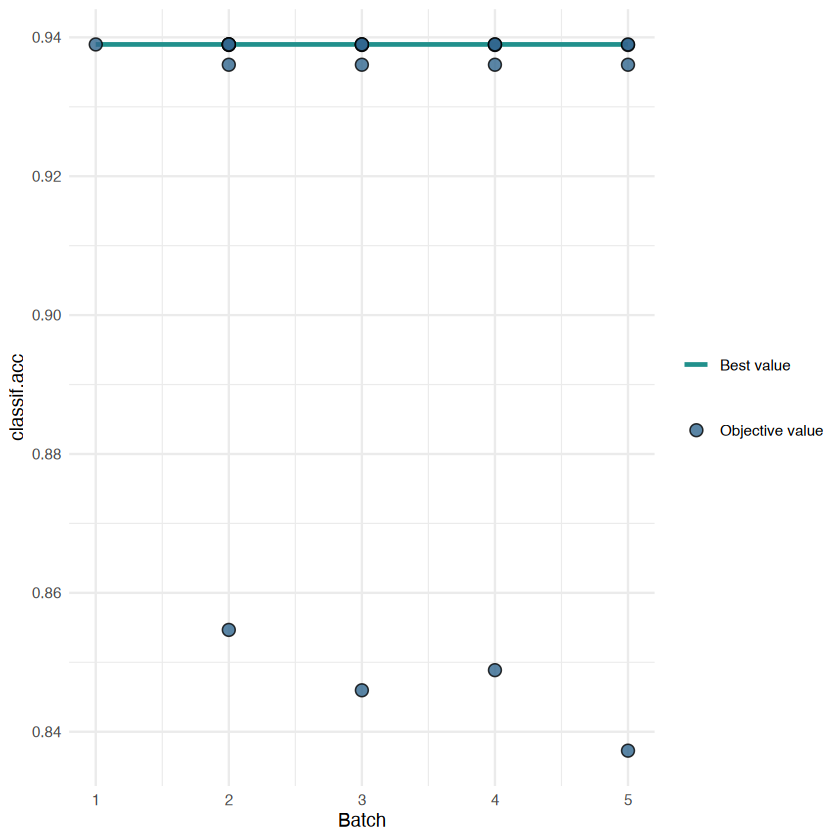

In [111]:
autoplot(instance, type = "performance")

In [112]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")

instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

fselect <- fs("sequential", strategy = "stepwise")

fselect$optimize(instance)

as.data.table(instance$result)[, .(features, classif.acc)]

ERROR: Error in self$assert(xs, sanitize = TRUE): Assertion on 'xs' failed: strategy: Must be element of set {'sfs','sbs'}, but is 'stepwise'.


In [ ]:
full_model <- lm(mpg ~ ., data = mtcars)
backward_model <- step(full_model, direction = "backward")
summary(backward_model)

Start:  AIC=70.9
mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- cyl   1    0.0799 147.57 68.915
- vs    1    0.1601 147.66 68.932
- carb  1    0.4067 147.90 68.986
- gear  1    1.3531 148.85 69.190
- drat  1    1.6270 149.12 69.249
- disp  1    3.9167 151.41 69.736
- hp    1    6.8399 154.33 70.348
- qsec  1    8.8641 156.36 70.765
<none>              147.49 70.898
- am    1   10.5467 158.04 71.108
- wt    1   27.0144 174.51 74.280

Step:  AIC=68.92
mpg ~ disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- vs    1    0.2685 147.84 66.973
- carb  1    0.5201 148.09 67.028
- gear  1    1.8211 149.40 67.308
- drat  1    1.9826 149.56 67.342
- disp  1    3.9009 151.47 67.750
- hp    1    7.3632 154.94 68.473
<none>              147.57 68.915
- qsec  1   10.0933 157.67 69.032
- am    1   11.8359 159.41 69.384
- wt    1   27.0280 174.60 72.297

Step:  AIC=66.97
mpg ~ disp + hp + drat + wt + qsec + am


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
am            2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


In [ ]:
null_model <- lm(mpg ~ 1, data = mtcars)  # 只含截距
forward_model <- step(
  null_model,
  scope = list(lower = null_model, upper = full_model),
  direction = "forward"
)
summary(forward_model)


Start:  AIC=115.94
mpg ~ 1

       Df Sum of Sq     RSS     AIC
+ wt    1    847.73  278.32  73.217
+ cyl   1    817.71  308.33  76.494
+ disp  1    808.89  317.16  77.397
+ hp    1    678.37  447.67  88.427
+ drat  1    522.48  603.57  97.988
+ vs    1    496.53  629.52  99.335
+ am    1    405.15  720.90 103.672
+ carb  1    341.78  784.27 106.369
+ gear  1    259.75  866.30 109.552
+ qsec  1    197.39  928.66 111.776
<none>              1126.05 115.943

Step:  AIC=73.22
mpg ~ wt

       Df Sum of Sq    RSS    AIC
+ cyl   1    87.150 191.17 63.198
+ hp    1    83.274 195.05 63.840
+ qsec  1    82.858 195.46 63.908
+ vs    1    54.228 224.09 68.283
+ carb  1    44.602 233.72 69.628
+ disp  1    31.639 246.68 71.356
<none>              278.32 73.217
+ drat  1     9.081 269.24 74.156
+ gear  1     1.137 277.19 75.086
+ am    1     0.002 278.32 75.217

Step:  AIC=63.2
mpg ~ wt + cyl

       Df Sum of Sq    RSS    AIC
+ hp    1   14.5514 176.62 62.665
+ carb  1   13.7724 177.40 62.805
<no


Call:
lm(formula = mpg ~ wt + cyl + hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9290 -1.5598 -0.5311  1.1850  5.8986 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.75179    1.78686  21.687  < 2e-16 ***
wt          -3.16697    0.74058  -4.276 0.000199 ***
cyl         -0.94162    0.55092  -1.709 0.098480 .  
hp          -0.01804    0.01188  -1.519 0.140015    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.512 on 28 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8263 
F-statistic: 50.17 on 3 and 28 DF,  p-value: 2.184e-11


In [117]:
stepwise_model <- step(
  null_model,
  scope = list(lower = null_model, upper = full_model),
  direction = "both"
)


Start:  AIC=115.94
mpg ~ 1

       Df Sum of Sq     RSS     AIC
+ wt    1    847.73  278.32  73.217
+ cyl   1    817.71  308.33  76.494
+ disp  1    808.89  317.16  77.397
+ hp    1    678.37  447.67  88.427
+ drat  1    522.48  603.57  97.988
+ vs    1    496.53  629.52  99.335
+ am    1    405.15  720.90 103.672
+ carb  1    341.78  784.27 106.369
+ gear  1    259.75  866.30 109.552
+ qsec  1    197.39  928.66 111.776
<none>              1126.05 115.943

Step:  AIC=73.22
mpg ~ wt

       Df Sum of Sq     RSS     AIC
+ cyl   1     87.15  191.17  63.198
+ hp    1     83.27  195.05  63.840
+ qsec  1     82.86  195.46  63.908
+ vs    1     54.23  224.09  68.283
+ carb  1     44.60  233.72  69.628
+ disp  1     31.64  246.68  71.356
<none>               278.32  73.217
+ drat  1      9.08  269.24  74.156
+ gear  1      1.14  277.19  75.086
+ am    1      0.00  278.32  75.217
- wt    1    847.73 1126.05 115.943

Step:  AIC=63.2
mpg ~ wt + cyl

       Df Sum of Sq    RSS    AIC
+ hp    1    

In [ ]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")

instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

fselect <- fs("rfe")

fselect$optimize(instance)

as.data.table(instance$result)[, .(features, classif.acc)]

# features                                                                                                      
# 1 bill_depth    , bill_length   , body_mass     , flipper_length, island        , sex           , year          
#   classif.acc
# 1 0.9447241

INFO  [14:19:41.561] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchRFE>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [14:19:41.565] [bbotk] Evaluating 1 configuration(s)
INFO  [14:19:41.568] [mlr3] Running benchmark with 3 resampling iterations
INFO  [14:19:41.572] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:19:41.583] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:19:41.593] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:19:41.603] [mlr3] Finished benchmark
INFO  [14:19:41.618] [bbotk] Result of batch 1:
INFO  [14:19:41.620] [bbotk]  bill_depth bill_length body_mass flipper_length island  sex year classif.acc
INFO  [14:19:41.620] [bbotk]        TRUE        TRUE      TRUE           TRUE   TRUE TRUE TRUE   0.9447241
INFO  [14:19:41.620] [bbotk]  warnings errors runtime_learners                                uhash
INFO  [14:19:41.620] [bbotk]         0      0     

bill_depth,bill_length,body_mass,flipper_length,island,sex,year,importance,features,n_features,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>,<list>,<int>,<dbl>
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,"6.666667, 6.333333, 5.000000, 4.000000, 3.000000, 2.000000, 1.000000","bill_depth , bill_length , body_mass , flipper_length, island , sex , year",7,0.9447241


features,classif.acc
<list>,<dbl>
"bill_depth , bill_length , body_mass , flipper_length, island , sex , year",0.9447241


In [ ]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")

instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

fselect <- fs("genetic_search")

fselect$optimize(instance)

as.data.table(instance$result)[, .(features, classif.acc)]

# features                       classif.acc
# 1 bill_length   , flipper_length 0.9273074

INFO  [14:21:53.626] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchGeneticSearch>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [14:21:53.920] [bbotk] Evaluating 1 configuration(s)
INFO  [14:21:53.924] [mlr3] Running benchmark with 3 resampling iterations
INFO  [14:21:53.930] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:21:53.941] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:21:53.952] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:21:53.961] [mlr3] Finished benchmark
INFO  [14:21:53.973] [bbotk] Result of batch 1:
INFO  [14:21:53.975] [bbotk]  bill_depth bill_length body_mass flipper_length island   sex  year classif.acc
INFO  [14:21:53.975] [bbotk]       FALSE       FALSE      TRUE          FALSE  FALSE FALSE FALSE   0.7180524
INFO  [14:21:53.975] [bbotk]  warnings errors runtime_learners                                uhash
INFO  [14:21:53.975] [bbotk]        

bill_depth,bill_length,body_mass,flipper_length,island,sex,year,features,n_features,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>,<int>,<dbl>
FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,"bill_length , flipper_length",2,0.9273074


features,classif.acc
<list>,<dbl>
"bill_length , flipper_length",0.9273074


In [ ]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")

instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

fselect <- fs("shadow_variable_search")

fselect$optimize(instance)

as.data.table(instance$result)[, .(features, classif.acc)]

# features                       classif.acc
# 1 bill_length   , flipper_length 0.9331045

INFO  [14:25:08.128] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchShadowVariableSearch>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [14:25:08.137] [bbotk] Evaluating 14 configuration(s)
INFO  [14:25:08.161] [mlr3] Running benchmark with 42 resampling iterations
INFO  [14:25:08.227] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:25:08.258] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:25:08.276] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:25:08.287] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:25:08.297] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [14:25:08.307] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [14:25:08.345] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [14:25:08.356] [mlr3] Applying learner 'classif.rpart' on task 'pengui

bill_depth,bill_length,body_mass,flipper_length,island,sex,year,features,n_features,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>,<int>,<dbl>
FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,"bill_length , flipper_length",2,0.9331045


features,classif.acc
<list>,<dbl>
"bill_length , flipper_length",0.9331045


In [5]:
library(mlr3verse)
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
msr() %>% as.data.table()

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustSil has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustSil.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.



key,label,task_type,packages,predict_type,properties,task_properties
<chr>,<chr>,<chr>,<list>,<chr>,<list>,<list>
aic,Akaike Information Criterion,NA,mlr3,NA,"na_score , requires_learner , requires_model , requires_no_prediction",
bic,Bayesian Information Criterion,NA,mlr3,NA,"na_score , requires_learner , requires_model , requires_no_prediction",
ci,Default CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
ci.con_z,Conservative-Z CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
ci.cor_t,Corrected-T CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
ci.holdout,Holdout CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
ci.ncv,Nested CV CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
ci.wald_cv,Naive CV CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
classif.acc,Classification Accuracy,classif,"mlr3 , mlr3measures",response,,


In [8]:
msr()

<DictionaryMeasure> with 75 stored values
Keys: aic, bic, ci, ci.con_z, ci.cor_t, ci.holdout, ci.ncv, ci.wald_cv,
  classif.acc, classif.auc, classif.bacc, classif.bbrier, classif.ce,
  classif.costs, classif.dor, classif.fbeta, classif.fdr, classif.fn,
  classif.fnr, classif.fomr, classif.fp, classif.fpr, classif.logloss,
  classif.mauc_au1p, classif.mauc_au1u, classif.mauc_aunp,
  classif.mauc_aunu, classif.mauc_mu, classif.mbrier, classif.mcc,
  classif.npv, classif.ppv, classif.prauc, classif.precision,
  classif.recall, classif.sensitivity, classif.specificity, classif.tn,
  classif.tnr, classif.tp, classif.tpr, clust.ch, clust.dunn,
  clust.silhouette, clust.wss, debug_classif, internal_valid_score,
  oob_error, regr.bias, regr.ktau, regr.mae, regr.mape, regr.maxae,
  regr.medae, regr.medse, regr.mse, regr.msle, regr.pbias,
  regr.pinball, regr.rae, regr.rmse, regr.rmsle, regr.rrse, regr.rse,
  regr.rsq, regr.sae, regr.smape, regr.srho, regr.sse,
  selected_features, sim.jaccard,

In [ ]:
library(mlr3verse)

tsk_mtcars <- tsk("mtcars")
lrn_ranger <- lrn("regr.ranger")
msr_mse <- msr("aic")

lrn_ranger$train(tsk_mtcars)


ERROR: Error: attempt to apply non-function


In [20]:
tsk_german <- tsk("german_credit")
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")
msr_acc <- msr("classif.auc")

lrn_rpart$train(tsk_german)
msr_acc$score(lrn_rpart$predict(tsk_german))

[1] 0.7805095

In [ ]:
lrn() %>%
  as.data.table() %>%
  select(key, label) %>%
  filter(str_detect(key, "clust"))

#   key                label                                
# 1  clust.MBatchKMeans Mini Batch K-Means                   
# 2  clust.SimpleKMeans K-Means (Weka)                       
# 3  clust.agnes        Agglomerative Hierarchical Clustering
# 4  clust.ap           Affinity Propagation Clustering      
# 5  clust.bico         BICO Clustering                      
# 6  clust.birch        BIRCH Clustering                     
# 7  clust.cmeans       Fuzzy C-Means Clustering Learner     
# 8  clust.cobweb       Cobweb Clustering                    
# 9  clust.dbscan       Density-Based Clustering             
# 10 clust.dbscan_fpc   Density-Based Clustering with fpc    
# 11 clust.diana        Divisive Hierarchical Clustering     
# 12 clust.em           Expectation-Maximization Clustering  
# 13 clust.fanny        Fuzzy Analysis Clustering            
# 14 clust.featureless  Featureless Clustering               
# 15 clust.ff           Farthest First Clustering            
# 16 clust.hclust       Agglomerative Hierarchical Clustering
# 17 clust.hdbscan      HDBSCAN Clustering                   
# 18 clust.kkmeans      Kernel K-Means                       
# 19 clust.kmeans       K-Means                              
# 20 clust.mclust       Gaussian Mixture Models Clustering   
# 21 clust.meanshift    Mean Shift Clustering                
# 22 clust.optics       OPTICS Clustering                    
# 23 clust.pam          Partitioning Around Medoids          
# 24 clust.xmeans       X-means

key,label
<chr>,<chr>
clust.MBatchKMeans,Mini Batch K-Means
clust.SimpleKMeans,K-Means (Weka)
clust.agnes,Agglomerative Hierarchical Clustering
clust.ap,Affinity Propagation Clustering
clust.bico,BICO Clustering
clust.birch,BIRCH Clustering
clust.cmeans,Fuzzy C-Means Clustering Learner
clust.cobweb,Cobweb Clustering
clust.dbscan,Density-Based Clustering


In [42]:
lrn()

<DictionaryLearner> with 181 stored values
Keys: classif.AdaBoostM1, classif.C50, classif.IBk, classif.J48,
  classif.JRip, classif.LMT, classif.OneR, classif.PART, classif.abess,
  classif.bart, classif.bayes_net, classif.catboost, classif.cforest,
  classif.ctree, classif.cv_glmnet, classif.debug,
  classif.decision_stump, classif.decision_table, classif.earth,
  classif.featureless, classif.fnn, classif.gam, classif.gamboost,
  classif.gausspr, classif.gbm, classif.glmboost, classif.glmer,
  classif.glmnet, classif.imbalanced_rfsrc, classif.kknn,
  classif.kstar, classif.ksvm, classif.lda, classif.liblinear,
  classif.lightgbm, classif.log_reg, classif.logistic, classif.lssvm,
  classif.mob, classif.multilayer_perceptron, classif.multinom,
  classif.naive_bayes, classif.naive_bayes_multinomial,
  classif.naive_bayes_weka, classif.nnet, classif.priority_lasso,
  classif.qda, classif.randomForest, classif.random_forest_weka,
  classif.random_tree, classif.ranger, classif.reptree, clas